# Texto

Como simplificar um dataset que não é representada por zeros e uns?
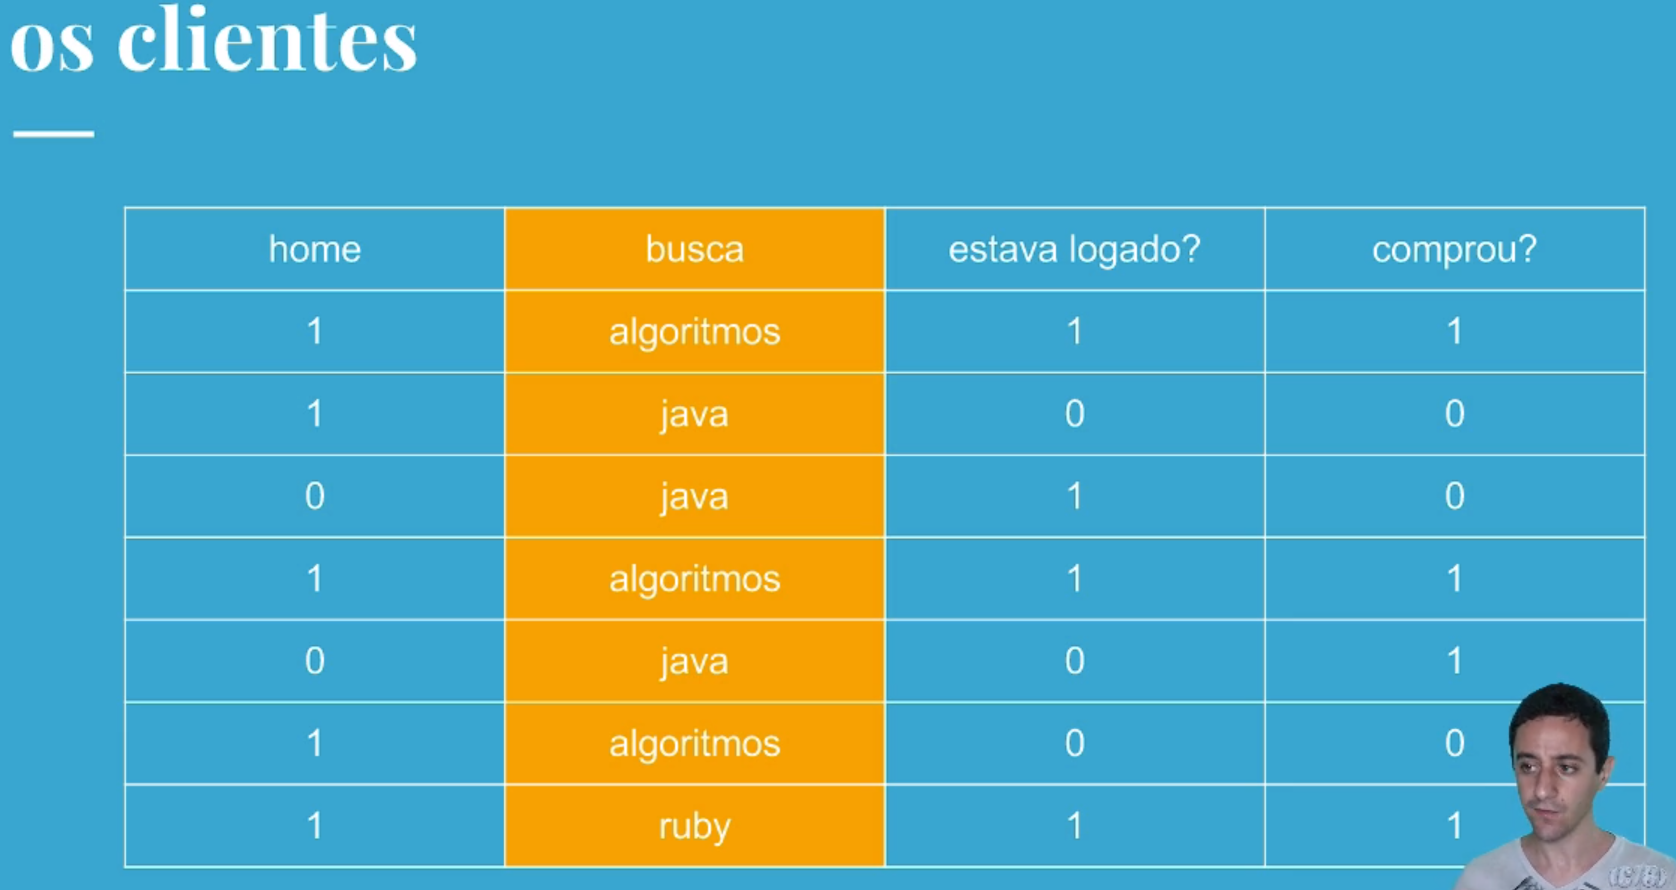
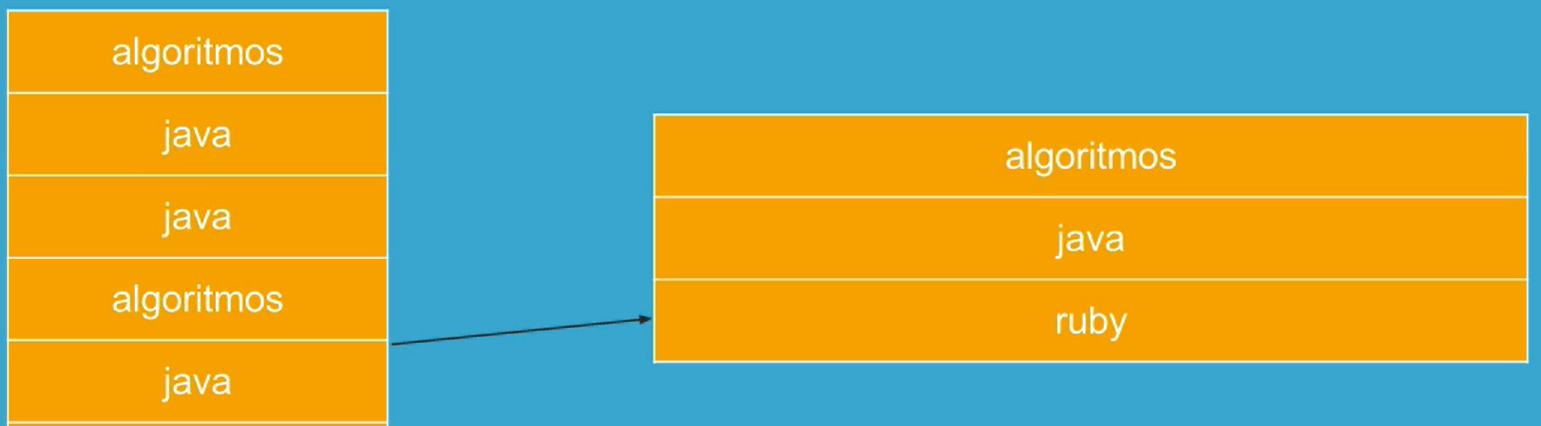
Variaveis categoricas: Separamos em categorias diferentes
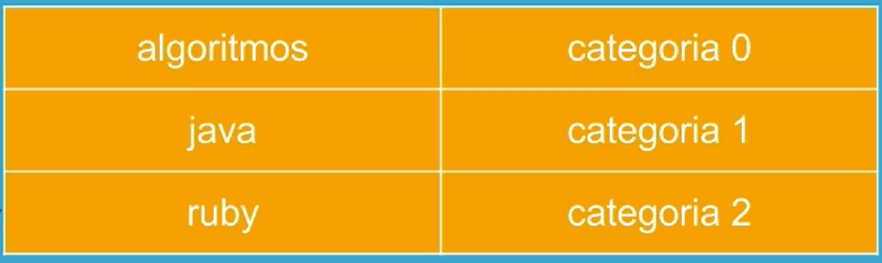

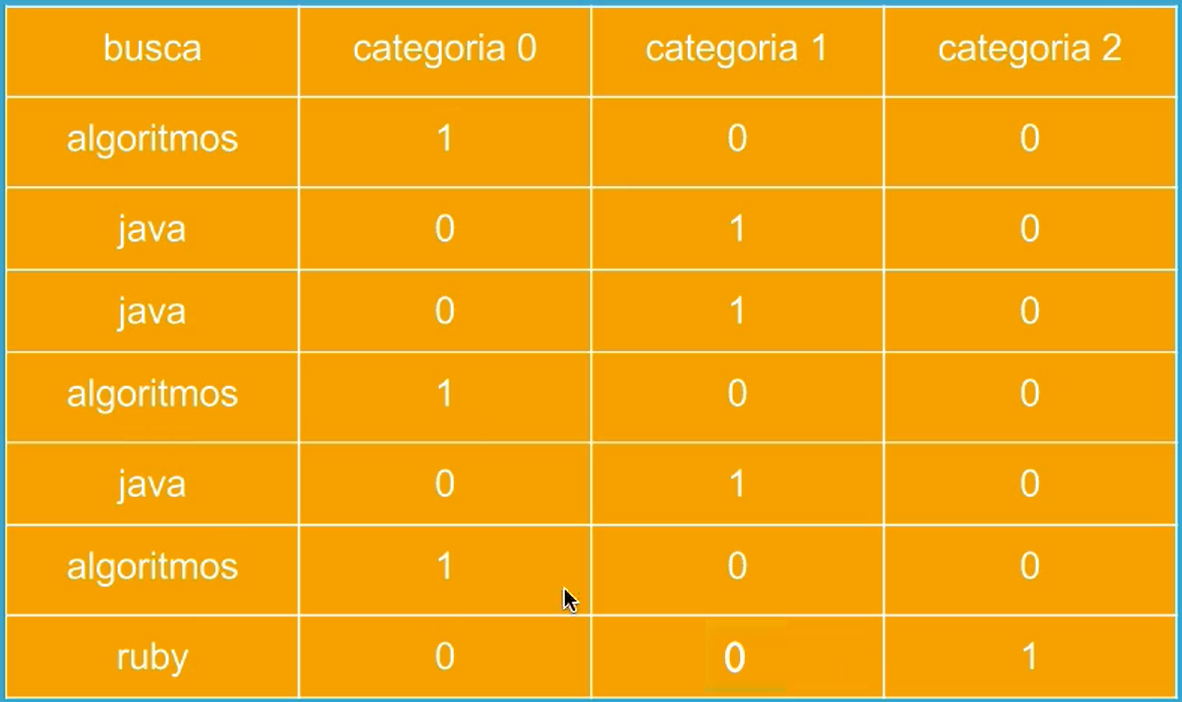


In [15]:
import pandas as pd

df = pd.read_csv('d01_busca2.csv', sep=',')
df.head()

,home,busca,logado,comprou
0,0,ruby,1,1
1,1,algoritmos,0,0
2,0,algoritmos,0,1
3,1,java,1,1
4,1,algoritmos,0,0


In [16]:
df_features = pd.get_dummies(df[['home','busca','logado']])
df_features.head()

,home,logado,busca_algoritmos,busca_java,busca_ruby
0,0,1,0,0,1
1,1,0,1,0,0
2,0,0,1,0,0
3,1,1,0,1,0
4,1,0,1,0,0


In [17]:
df_target = df['comprou']
df_target

0     1
1     0
2     1
3     1
4     0
     ..
70    0
71    1
72    1
73    1
74    1
Name: comprou, Length: 75, dtype: int64

# Preparação

In [24]:
from sklearn.model_selection import train_test_split, 

treino_x, teste_x, treino_y, teste_y = train_test_split(df_features.values, df_target, test_size = 0.1, stratify = df_target)

print(f'treino_x: {treino_x.shape} | teste_x: {teste_x.shape} | treino_y: {treino_y.shape} | teste_y: {teste_y.shape} ')

treino_x: (67, 5) | teste_x: (8, 5) | treino_y: (67,) | teste_y: (8,) 


# Classificação

In [25]:
def fit_and_predict(modelo, treino_x, teste_x, treino_y, teste_y):
    %time modelo.fit(X=treino_x, y=treino_y)
    y_pred = modelo.predict(teste_x)


    taxa_de_acerto = accuracy_score(y_true = teste_y, y_pred = y_pred)
    print(f"Taxa de acerto: {taxa_de_acerto * 100:.2f}% | Modelo: {modelo}" ) 
    
    


In [26]:
SEED = 5
import numpy as np

np.random.seed(SEED)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score

models = [MultinomialNB(), SVC(), LinearSVC(), AdaBoostClassifier(), DummyClassifier() ]

for mod in models:
    fit_and_predict(mod, treino_x, teste_x, treino_y, teste_y)


Wall time: 2 ms
Taxa de acerto: 75.00% | Modelo: MultinomialNB()
Wall time: 1 ms
Taxa de acerto: 87.50% | Modelo: SVC()
Wall time: 1.67 ms
Taxa de acerto: 87.50% | Modelo: LinearSVC()
Wall time: 73.1 ms
Taxa de acerto: 87.50% | Modelo: AdaBoostClassifier()
Wall time: 1.01 ms
Taxa de acerto: 62.50% | Modelo: DummyClassifier()


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "
